<a href="https://colab.research.google.com/github/ricopgm/Projeto_Imersao_IA/blob/main/Projeto_Imersao_IA_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U google-generativeai

In [2]:
#iniciando o processo de importação das bibliotecas necessárias ao projeto.
import google.generativeai as genai
from google.colab import widgets
from IPython.display import display
from IPython.display import Markdown
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import textwrap

#ocultando a API Key
from google.colab import userdata

#declarando a variável 'SECRET_KEY' e o método para obter.
api_key = userdata.get('SECRET_KEY')

#Solicitando que a autenticação ocorra através da api_key, que está devidamente guardada no cofre de segredos da conta.
genai.configure(api_key=api_key)

In [3]:
generation_config = {
    "candidate_count": 1,
    "temperature": 1,
}

In [4]:
safety_settings = {
    "HARASSMENT": "BLOCK_NONE",
    "HATE": "BLOCK_NONE",
    "SEXUAL": "BLOCK_NONE",
    "DANGEROUS": "BLOCK_NONE"
}

In [5]:
#primeiro listar os modelos de conteúdo disponíveis.
for mod in genai.list_models():
  if 'generateContent' in mod.supported_generation_methods:
    print(mod.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [6]:
#depois a escolha pelo modelo de conteúdo mais estável.
mod = genai.GenerativeModel(model_name="gemini-1.0-pro",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

In [29]:
#Criando a funcionalidade para definir a coleta de dados para empresa ou transportadora
def valida_entrada(prompt, tipo_dado):
  """
  Validação da entrada de dados

  Argumentos:
    prompt: Texto a ser exibido antes da entrada de dados.
    tipo_dado: Formato dos dados (int ou str).

  Retorno:
    Dados digitados após a validação.
  """
  while True:
    try:
      valor = input(prompt)
      if tipo_dado == int:
        valor = int(valor)
      elif tipo_dado == str:
        valor = valor.strip()
      else:
        raise ValueError("Dado inválido.")
      return valor
    except ValueError:
      print("Dado inválido. Tente novamente.")

#Pergunta a profissão do usuário
segmento = valida_entrada("Você é (empresa ou transportadora)? ", str).lower()

while segmento not in ["empresa", "transportadora"]:
  segmento = valida_entrada("Segmento inválido. Digite novamente (empresa ou transportadora): ", str).lower()

#Formulário para empresas
if segmento == "empresa":
  dados_empresa = {
      "total_pedidos": None,
      "total_pedidos_cancelados": None,
      "total_pedidos_incompletos": None,
      "total_pedidos_no_prazo": None,
      "total_pedidos_mercadoria_errada": None,
      "total_pedidos_faturados": None,
      "total_pedidos_atrasados": None,
      "total_pedidos_devolvidos": None,
      "total_pedidos_entregues": None
  }

  for campo in dados_empresa:
    while True:
      valor = valida_entrada(f"Digite o {campo}: ", int)
      dados_empresa[campo] = valor
      if valor is not None:
        break
      print("Atenção! O campo está sem preenchimento.")

  #Exibe os dados coletados
  print("\nDados coletados:")
  for campo, valor in dados_empresa.items():
    print(f"{campo}: {valor}")

#Formulário para transportadoras
elif segmento == "transportadora":
  dados_transp = {
      "total_entregas_realizadas": None,
      "total_entregas_no_prazo": None,
      "total_entregas_atrasadas": None,
      "total_entregas_devolvidas": None
  }

  for campo in dados_transp:
    while True:
      valor = valida_entrada(f"Digite o {campo}: ", int)
      dados_transp[campo] = valor
      if valor is not None:
        break
      print("Atenção! O campo está sem preenchimento.")

  #Exibe os dados coletados
  print("\nDados coletados:")
  for campo, valor in dados_transp.items():
    print(f"{campo}: {valor}")

print("\nInformações de Logística de Entrega completas!")

Você é (empresa ou transportadora)? empresa
Digite o total_pedidos: 95
Digite o total_pedidos_cancelados: 15
Digite o total_pedidos_incompletos: 10
Digite o total_pedidos_no_prazo: 70
Digite o total_pedidos_mercadoria_errada: 0
Digite o total_pedidos_faturados: 80
Digite o total_pedidos_atrasados: 5
Digite o total_pedidos_devolvidos: 5
Digite o total_pedidos_entregues: 75

Dados coletados:
total_pedidos: 95
total_pedidos_cancelados: 15
total_pedidos_incompletos: 10
total_pedidos_no_prazo: 70
total_pedidos_mercadoria_errada: 0
total_pedidos_faturados: 80
total_pedidos_atrasados: 5
total_pedidos_devolvidos: 5
total_pedidos_entregues: 75

Informações de Logística de Entrega completas!


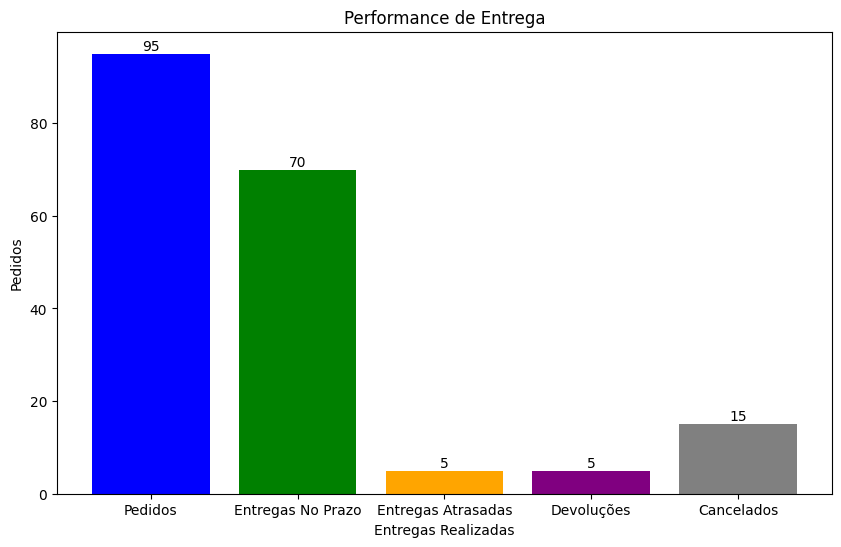

In [30]:
#Considerando os dados informados
entregas_realizadas = ["Pedidos", "Entregas No Prazo", "Entregas Atrasadas", "Devoluções", "Cancelados"]
pedidos_entregues_empresa = np.array([dados_empresa["total_pedidos"],
                                 dados_empresa["total_pedidos_no_prazo"],
                                 dados_empresa["total_pedidos_atrasados"],
                                 dados_empresa["total_pedidos_devolvidos"],
                                 dados_empresa["total_pedidos_cancelados"]])

plt.figure(figsize=(10, 6))
barras = plt.bar(entregas_realizadas, pedidos_entregues_empresa, color=['blue', 'green', 'orange', 'purple', 'gray'], align='center')

# Adicionar rótulos de dados acima de cada barra
for barra, valor in zip(barras, pedidos_entregues_empresa):
    altura_barra = valor + 0.1  # Ajustar a altura do rótulo se necessário
    plt.text(barra.get_x() + barra.get_width() / 2, altura_barra, valor, ha='center', va='bottom')

plt.xlabel("Entregas Realizadas")
plt.ylabel("Pedidos")
plt.title("Performance de Entrega")
plt.show()

In [31]:
#Criando a variável de chat
chat = mod.start_chat(history=[])

In [32]:
#Iniciando um chatbot
prompt = input("Faça a sua pergunta: ")

#Criando as condições de interação
while prompt != "sair":
  response = chat.send_message(prompt)
  print("Resposta: ", response.text, "\n")
  prompt = input("Digite a sua pergunta: ")

Faça a sua pergunta: qual é a quantidade de pedidos cancelados com base no historico
Resposta:  Não forneci acesso a dados específicos para calcular o número de pedidos cancelados com base no histórico. Por isso, não consigo fornecer essa informação. 

Digite a sua pergunta: como eu devo calcular a performance de entrega em logistica
Resposta:  **Como Calcular a Performance de Entrega em Logística:**

**1. Estabeleça Métricas de Desempenho:**

* **Taxa de Entregas no Prazo:** Porcentagem de pedidos entregues dentro do prazo acordado.
* **Tempo Médio de Entrega:** Tempo médio entre a colocação e a entrega do pedido.
* **Taxa de Erros:** Porcentagem de pedidos entregues com erros (por exemplo, itens ausentes, danos).
* **Satisfação do Cliente:** Feedback do cliente sobre a pontualidade e qualidade das entregas.

**2. Colete Dados:**

* Rastreador GPS para monitorar entregas em tempo real.
* Sistema de gerenciamento de pedidos (OMS) para registrar horários de colocação e entrega.
* Pesqui

In [33]:
#Melhorando a visualização
def to_markdown(text):
  """Formata o texto como Markdown."""
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

#Imprimindo o histórico
for message in chat.history:
  display(to_markdown(f"**{message.role}:** {message.parts[0].text}"))
  print('------------------------------')

> **user:** qual é a quantidade de pedidos cancelados com base no historico

------------------------------


> **model:** Não forneci acesso a dados específicos para calcular o número de pedidos cancelados com base no histórico. Por isso, não consigo fornecer essa informação.

------------------------------


> **user:** como eu devo calcular a performance de entrega em logistica

------------------------------


> **model:** **Como Calcular a Performance de Entrega em Logística:**
> 
> **1. Estabeleça Métricas de Desempenho:**
> 
> * **Taxa de Entregas no Prazo:** Porcentagem de pedidos entregues dentro do prazo acordado.
> * **Tempo Médio de Entrega:** Tempo médio entre a colocação e a entrega do pedido.
> * **Taxa de Erros:** Porcentagem de pedidos entregues com erros (por exemplo, itens ausentes, danos).
> * **Satisfação do Cliente:** Feedback do cliente sobre a pontualidade e qualidade das entregas.
> 
> **2. Colete Dados:**
> 
> * Rastreador GPS para monitorar entregas em tempo real.
> * Sistema de gerenciamento de pedidos (OMS) para registrar horários de colocação e entrega.
> * Pesquisas de satisfação do cliente.
> 
> **3. Calcule as Métricas:**
> 
> **Taxa de Entregas no Prazo:**
> 
> * Número de entregas no prazo / Número total de entregas
> 
> **Tempo Médio de Entrega:**
> 
> * Somme o tempo de entrega de todos os pedidos / Número total de pedidos
> 
> **Taxa de Erros:**
> 
> * Número de entregas com erros / Número total de entregas
> 
> **Satisfação do Cliente:**
> 
> * Analise as classificações e comentários dos clientes recebidos por meio de pesquisas ou avaliações online.
> 
> **4. Analise os Resultados:**
> 
> Compare as métricas com as metas estabelecidas e identifique áreas para melhoria. Considere os seguintes fatores:
> 
> * **Tendências:** Acompanhe as métricas ao longo do tempo para identificar padrões.
> * **Causa raiz:** Investigue as causas dos atrasos, erros ou insatisfação do cliente.
> * **Melhorias:** Implemente soluções para resolver problemas e otimizar o desempenho de entrega.
> 
> **5. Relate e Comunique:**
> 
> * Compartilhe regularmente os resultados da performance de entrega com as partes interessadas.
> * Use dados e insights para informar as decisões de logística e melhorar a eficiência.

------------------------------
